In [1]:
from HeaderP import *

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def Randomwalk1D(n, timestep): #n here is the no. of steps that we require
    x = 0
    y = 0
    xposition = [0] #starting from origin (0,0)
    yposition = [0] 

    for i in range (1,n+1):
        step = np.random.uniform(0,1)

        if step < 0.5: # if step is less than 0.5 we move up    
            x += timestep
            y += 1*np.sqrt(timestep)  #moving up in u direction

        if step > 0.5: # if step is greater than 0.5 we move down  
            x += timestep
            y += -1*np.sqrt(timestep) #moving down in y direction

        xposition.append(x)
        yposition.append(y)
    return [xposition,yposition]


Text(0, 0.5, 'dR')

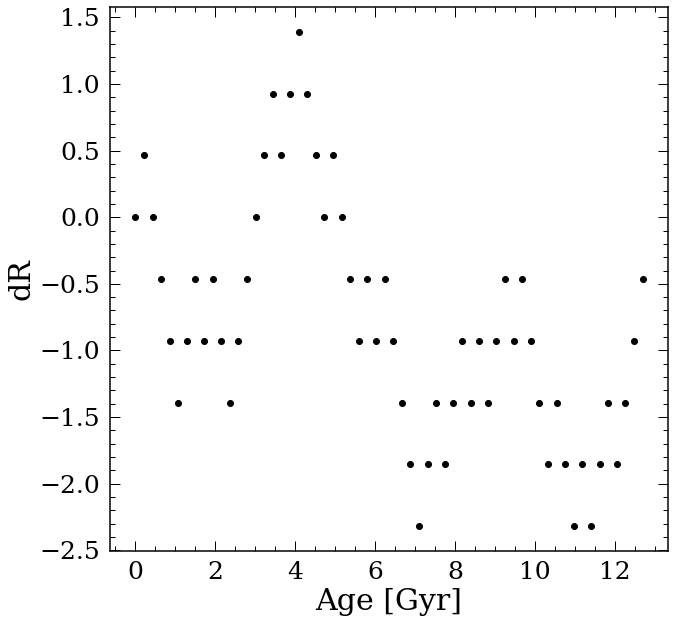

In [80]:
x, y = Randomwalk1D(59, 0.215)
plt.plot(x,y,'ko')
plt.xlabel('Age [Gyr]')
plt.ylabel('dR')

<ipython-input-81-e50a424a3e68>:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-81-e50a424a3e68>:22: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


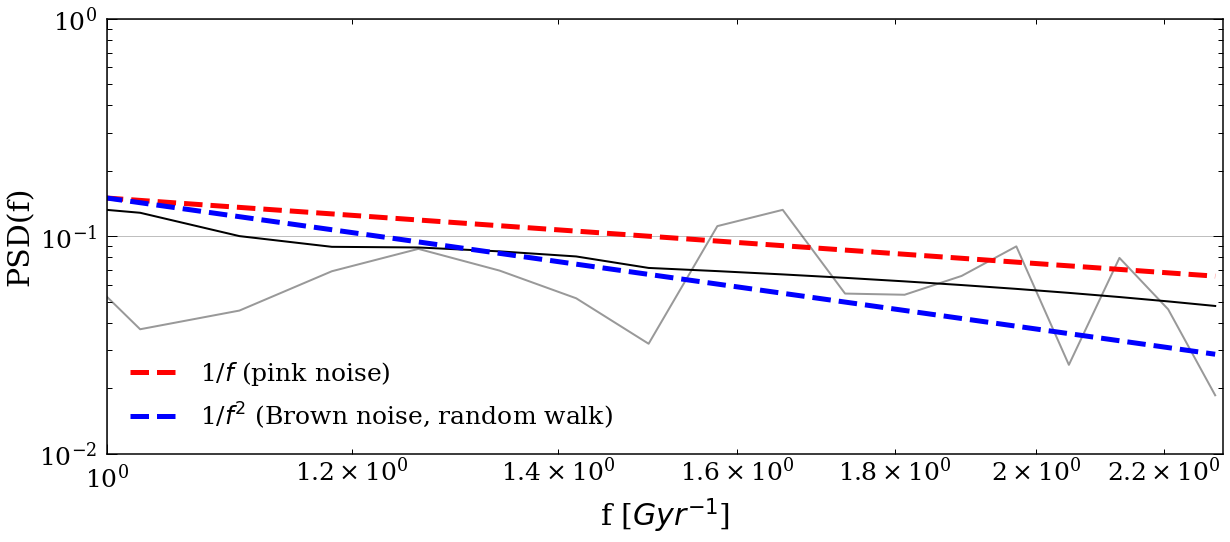

In [81]:
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

N = len(x)
T = max(x)/N
yf = fft(y)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A = 0.15
plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([1,2.3])
plt.ylim([1e-2,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

# Generate 1000 particles

In [100]:
npart = 1000
ages, drs = np.zeros((npart,60)), np.zeros((npart,60))
for i in range(npart):
    ages[i,:], drs[i,:] = Randomwalk1D(59, 0.215)
    

In [101]:
age_flat, drs_flat = ages.ravel(), drs.ravel()
print(np.shape(age_flat))

(60000,)


In [102]:
def SlideMed(age, dr, window, slide):
    age, dr = np.array(age), np.array(dr)
    minage, maxage = min(age), max(age)
    npoints = int((maxage-minage)/slide)
    medage = np.zeros(npoints)*np.nan
    meddr = np.zeros(npoints)*np.nan
    for i in trange(npoints):
        if i==0:
            m_w = (age<window)
        elif i==npoints-1:
            m_w = (age>(maxage-window))
        else:
            m_w = ((age>(i*slide-window+minage))&(age<(i*slide+window+minage)))
        #print(sum(m_w))
        medage[i], meddr[i] = np.mean(age[m_w]), np.mean(dr[m_w])
    m_nan = (meddr==meddr)
    medage, meddr = medage[m_nan], meddr[m_nan]
    return medage, meddr
        

  0%|          | 0/5073 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5073/5073 [00:00<00:00, 21183.59it/s]


Text(0, 0.5, 'ΔR [kpc]')

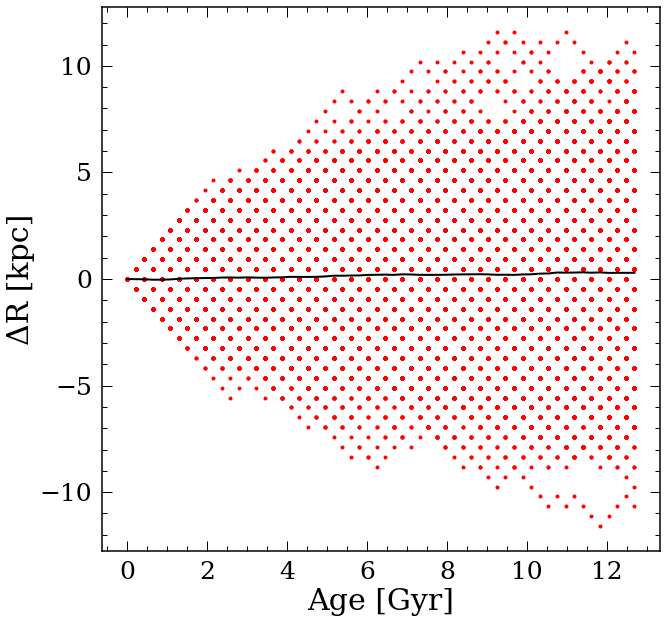

In [103]:
age_order, dr_order = zip(*sorted(zip(age_flat, drs_flat)))
age_smooth, dr_smooth = SlideMed(age_order, dr_order, 0.0025/2, 0.0025)

plt.plot(age_flat, drs_flat,'r.')
plt.plot(age_smooth, dr_smooth,'k-')
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

<ipython-input-106-e0fbe05334ee>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-106-e0fbe05334ee>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A*50/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


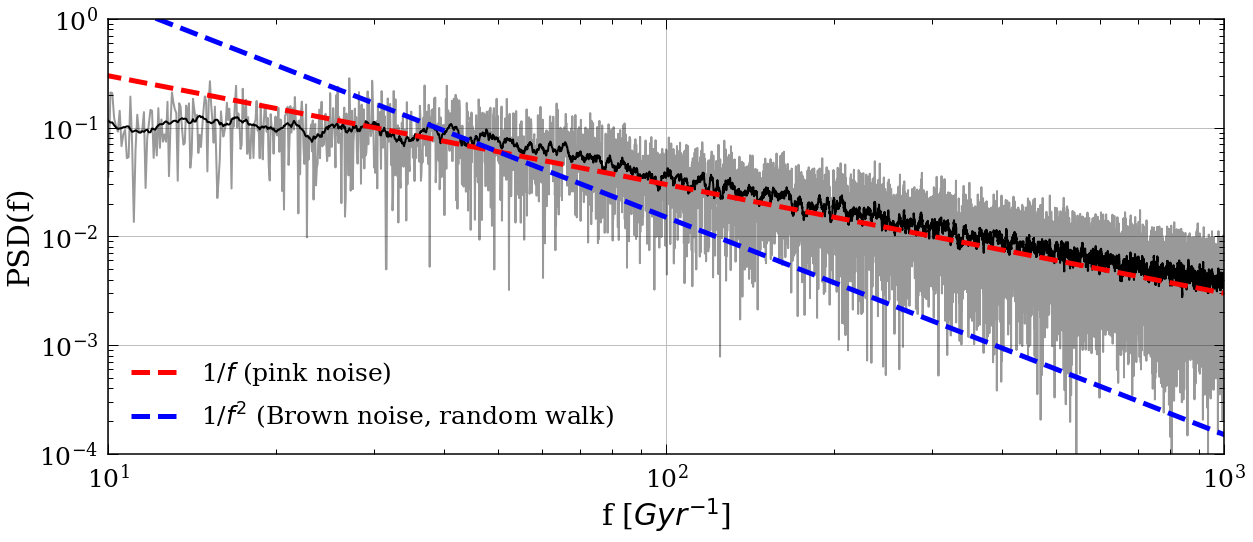

In [106]:
N = len(age_flat)
T = max(age_flat)/N
yf = fft(drs_flat)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A = 3
plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A*50/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([10,1e3])
plt.ylim([1e-4,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

# Generate 10000 particles

In [107]:
npart = 10000
ages, drs = np.zeros((npart,60)), np.zeros((npart,60))
for i in range(npart):
    ages[i,:], drs[i,:] = Randomwalk1D(59, 0.215)
    

In [108]:
age_flat, drs_flat = ages.ravel(), drs.ravel()
print(np.shape(age_flat))

(600000,)


  0%|          | 0/5073 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5073/5073 [00:01<00:00, 3149.98it/s]


Text(0, 0.5, 'ΔR [kpc]')

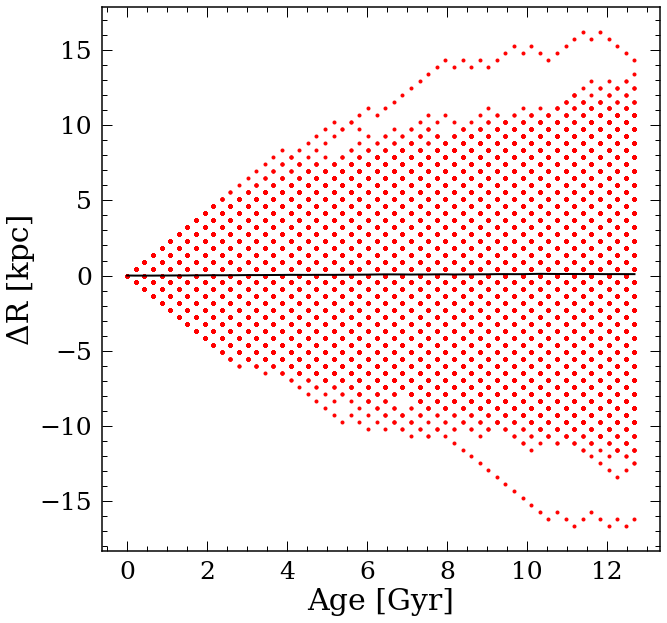

In [109]:
age_order, dr_order = zip(*sorted(zip(age_flat, drs_flat)))
age_smooth, dr_smooth = SlideMed(age_order, dr_order, 0.0025/2, 0.0025)

plt.plot(age_flat, drs_flat,'r.')
plt.plot(age_smooth, dr_smooth,'k-')
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

<ipython-input-126-35fd1a775c4c>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-126-35fd1a775c4c>:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


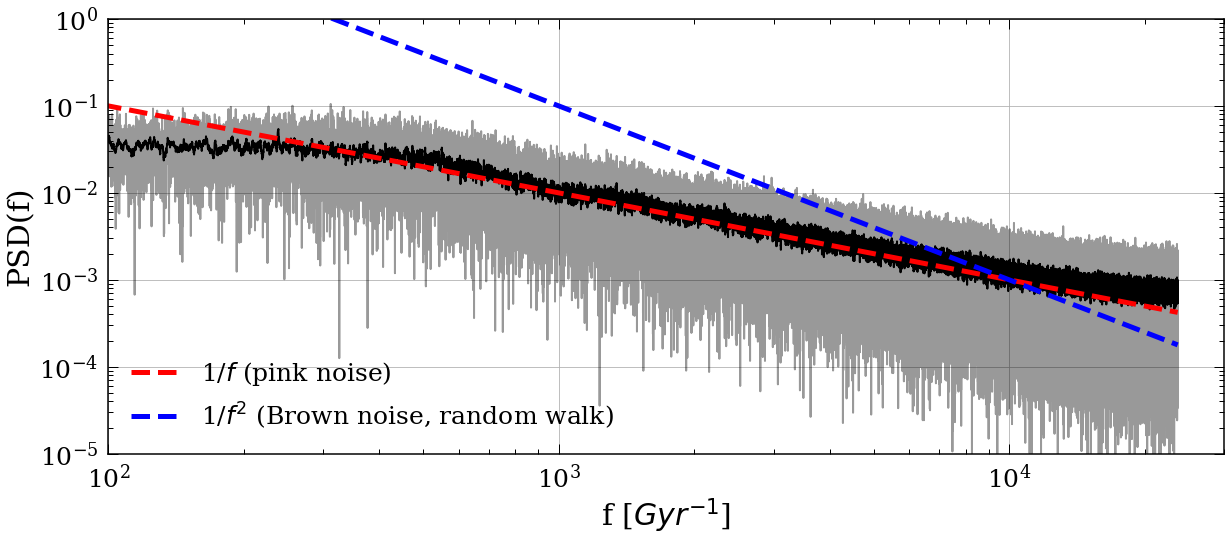

In [126]:
N = len(age_flat)
T = max(age_flat)/N
yf = fft(drs_flat)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A1 = 10
A2 = 1e5
plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([100,3e4])
plt.ylim([1e-5,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

# sampling stars as Tobia's simulation

In [152]:
12000/60

200.0

In [202]:
ages, drs = np.zeros(0), np.zeros(0)

stellage = []
dR = []

for i in trange(59):
    for j in range(200):
        agenew, drnew = Randomwalk1D(59-i, 0.215)
        ages = np.append(ages, np.array(agenew)+i*0.215)
        drs = np.append(drs, np.array(drnew))
        
        stellage.append((59-i)*0.215)
        dR.append(drs[-1])

100%|██████████| 59/59 [00:02<00:00, 19.95it/s]


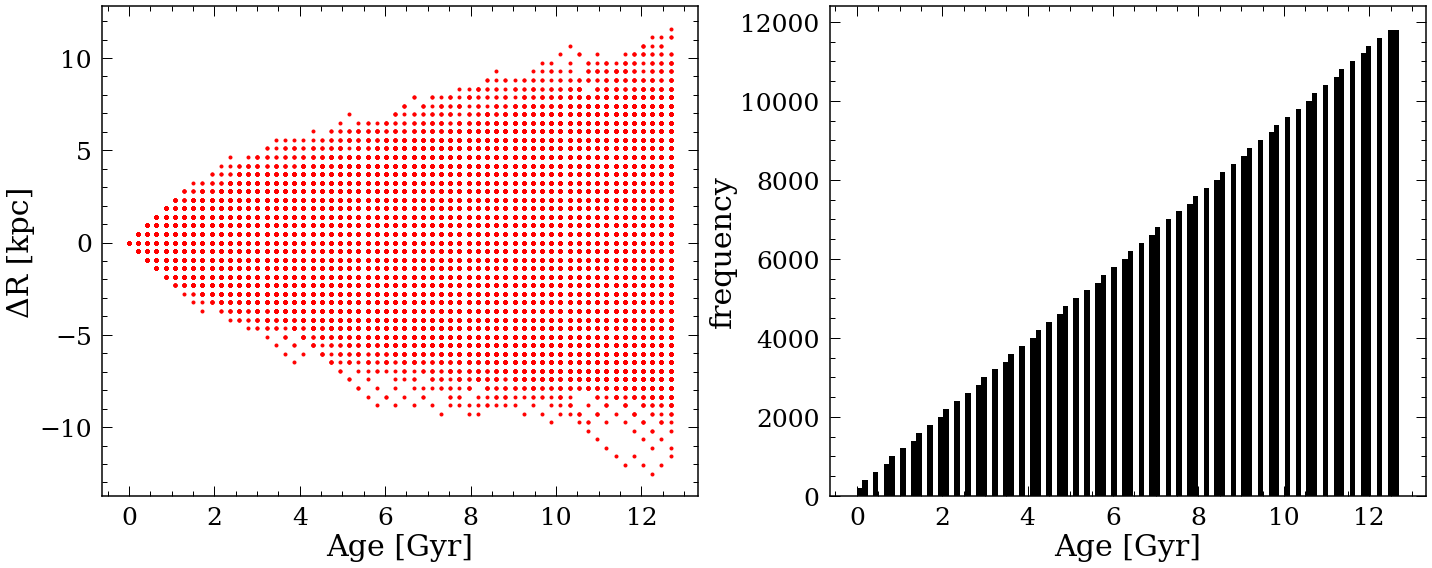

In [203]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(ages, drs, 'r.');
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

plt.subplot(1,2,2)
plt.hist(ages, bins=100, color='k');
plt.xlabel('Age [Gyr]')
plt.ylabel('frequency')
plt.tight_layout()

<ipython-input-204-0cbb1f5dc529>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-204-0cbb1f5dc529>:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


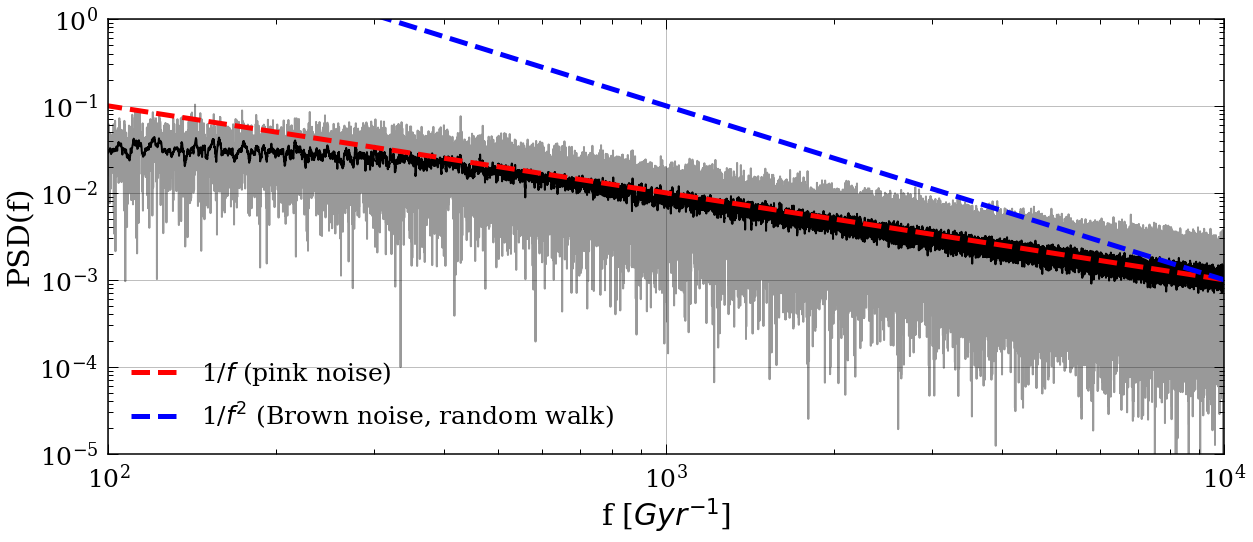

In [204]:
N = len(ages)
T = max(ages)/N
yf = fft(drs)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A1 = 10
A2 = 1e5
plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([100,1e4])
plt.ylim([1e-5,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

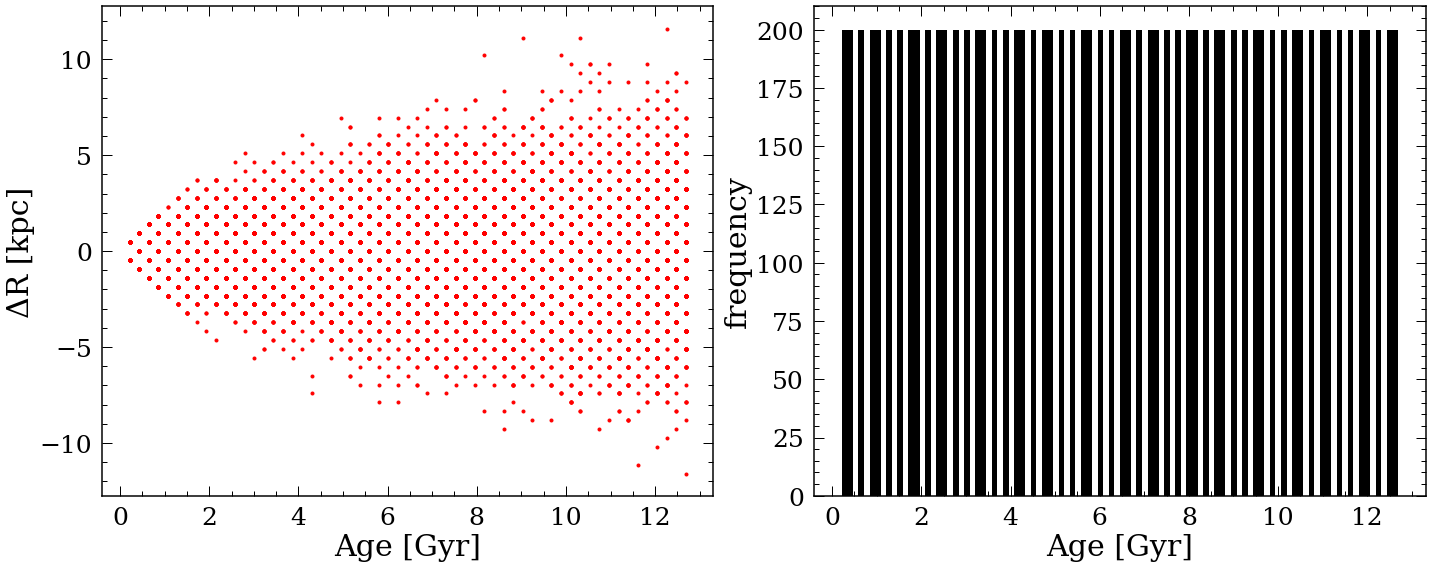

In [205]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(stellage, dR, 'r.');
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

plt.subplot(1,2,2)
plt.hist(stellage, bins=100, color='k');
plt.xlabel('Age [Gyr]')
plt.ylabel('frequency')
plt.tight_layout()

<ipython-input-206-0eda55bdb7b5>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-206-0eda55bdb7b5>:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


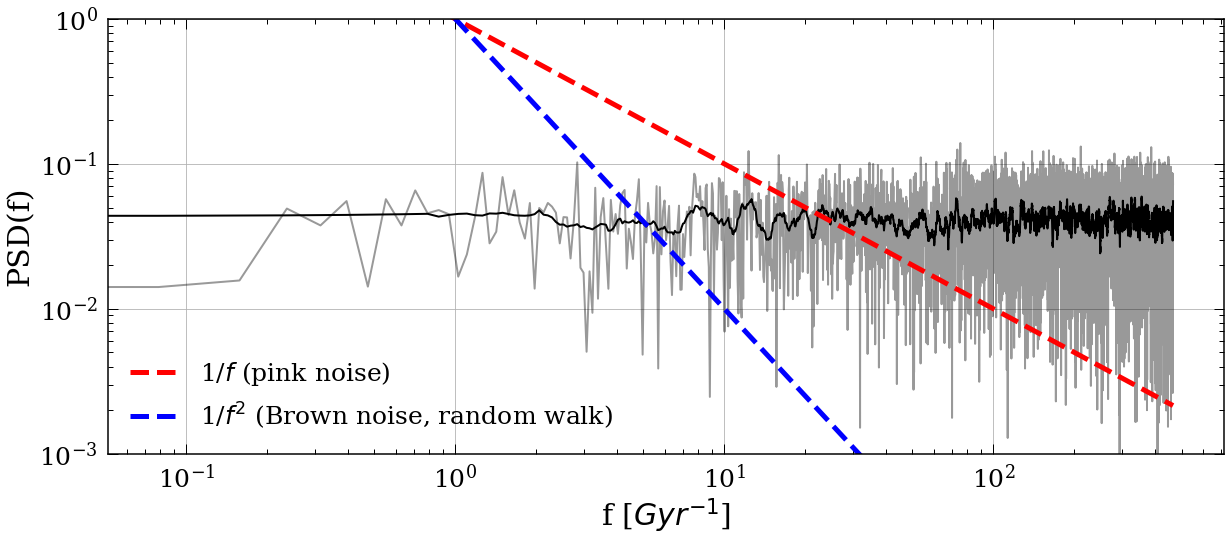

In [206]:
N = len(stellage)
T = max(stellage)/N
yf = fft(dR)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A1 = 1
A2 = 1
plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
#plt.xlim([100,3e4])
plt.ylim([1e-3,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)